# TNT VGG16 1024 Model

In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-02-11 13:32:18.633900: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load VGG16 without the top (classification) layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(1024, 1024, 3))

In [4]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 1024, 1024, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 512, 512, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 256, 256, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 128, 128, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Freeze the convolutional base (optional, speeds up training)
base_model.trainable = False

In [6]:
# Add new custom layers for binary classification
x = Flatten()(base_model.output) # Flattens the output of the base model
x = Dense(512, activation="relu")(x) # Fully connected layer with 512 neurons
x = Dropout(0.5)(x)  # Prevent overfitting, randomly drops 50% of neurons
x = Dense(1, activation="sigmoid")(x)  # Single neuron the ouputs probability score

In [7]:
# Create the new model
model = Model(inputs=base_model.input, outputs=x)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 1024, 1024, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 512, 512, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 256, 256, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 128, 128, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   268,435,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,151,169 (1.05 GB)

 Trainable params: 268,436,481 (1.00 GB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Compile the model for binary classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024, 1024, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 1024, 1024, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 1024, 1024, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 512, 512, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 512, 512, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 256, 256, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 256, 256, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 128, 128, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 128, 128, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   268,435,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,151,169 (1.05 GB)

 Trainable params: 268,436,481 (1.00 GB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# Define directories
train_dir = '/Users/danieldobrenz/Documents/DATA SCIENCE DOCUMENTS/DATA/Magnimind/AI Imaging/MedImgIntro-WORKSHOP-main/Second Projects/TNT Project/TNT Images 1024x1024'

In [12]:
# Create data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize images
    rotation_range=20,  # Augmentations
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split dataset (80% train, 20% validation)
)

In [13]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(1024, 1024),  # VGG16 input size
    batch_size=32,
    class_mode="binary",  # Binary classification
    subset="training"
)

Found 21 images belonging to 2 classes.


In [14]:
# Load validation data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(1024, 1024),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 4 images belonging to 2 classes.


In [15]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100  # Adjust as needed
)

# Save the trained model
model.save("vgg16_binary_classifier.keras")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 78s 78s/step - accuracy: 0.6667 - loss: 0.6223 - val_accuracy: 0.7500 - val_loss: 1.3674
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 77s 77s/step - accuracy: 0.7143 - loss: 1.6727 - val_accuracy: 0.7500 - val_loss: 0.8909
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 83s 83s/step - accuracy: 0.7143 - loss: 1.2358 - val_accuracy: 0.7500 - val_loss: 0.5699
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 80s 80s/step - accuracy: 0.8095 - loss: 0.4838 - val_accuracy: 0.2500 - val_loss: 1.0641
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 76s 76s/step - accuracy: 0.3810 - loss: 1.1536 - val_accuracy: 0.2500 - val_loss: 0.7332
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 84s 84s/step - accuracy: 0.2857 - loss: 0.9828 - val_accuracy: 0.7500 - val_loss: 0.5165
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 84s 84s/step - accuracy: 0.6190 - loss: 0.6321 - val_accuracy: 0.7500 - val_loss: 0.7776
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 79s 79s/step - accuracy: 0.7143 - loss: 0.8723 - val_accuracy: 0.7500 - val_loss:

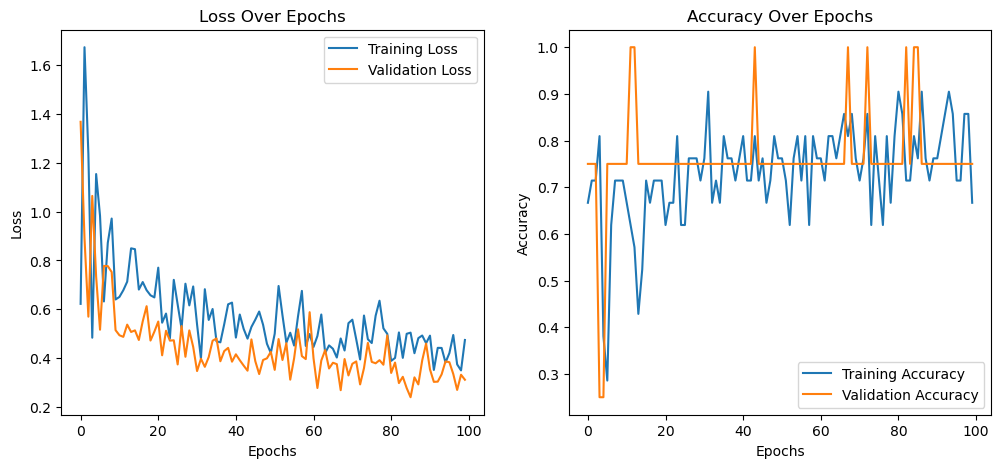

In [16]:
# Plot training & validation loss and accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Over Epochs")
    plt.legend()

    # Show plot
    plt.show()

# Call function to plot
plot_training_history(history)

Summary of the Two Plots
1. Loss Over Epochs (Left Plot)
- The training loss (blue line) and validation loss (orange line) both show a general decreasing trend over 100 epochs, which indicates that the model is learning.
- The training loss is highly fluctuating, suggesting possible instability in training (e.g., high learning rate or batch variability).
- The validation loss also decreases but remains noisy, implying potential overfitting or irregular generalization.
2. Accuracy Over Epochs (Right Plot)
- The training accuracy (blue line) shows an increasing trend with fluctuations, meaning the model is gradually improving its performance.
- The validation accuracy (orange line) is highly unstable, showing sharp jumps and dips, which could indicate overfitting, data inconsistency, or an unstable training process.
- In many epochs, validation accuracy is higher than training accuracy, which might be due to randomness in validation batch sampling or batch normalization effects.

Key Observations & Recommendations
- High Variability: Both loss and accuracy fluctuate significantly. Consider:
  - Using a lower learning rate.
  - Increasing the batch size for smoother training.
  - Applying regularization (dropout, L2 weight decay).
- Possible Overfitting: Validation metrics are more unstable than training ones.
  - Consider using early stopping to prevent training too long.
  - Introduce data augmentation to improve generalization.